# 랜덤포레스트 : https://ldjwj.github.io/ML_Basic_Class/part03_ml/ch02_03_03_RandomForest_03_house_2205.html

# 그라디언트 부스팅 : https://ldjwj.github.io/ML_Basic_Class/part03_ml/ch02_03_05_gradient_boosting_class_v11.html

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd

train = pd.read_csv('./House/train.csv')
test = pd.read_csv('./House/test.csv')
sub = pd.read_csv('./House/sample_submission.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [8]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [15]:
X_all = train.drop(['price'], axis=1)
y = train['price']
train.corr()['price']

id               0.020899
price            1.000000
bedrooms         0.323672
bathrooms        0.525479
sqft_living      0.702899
sqft_lot         0.096793
floors           0.262588
waterfront       0.265738
view             0.400806
condition        0.039740
grade            0.667211
sqft_above       0.608577
sqft_basement    0.322218
yr_built         0.047290
yr_renovated     0.140808
zipcode         -0.051498
lat              0.301604
long             0.023547
sqft_living15    0.586419
sqft_lot15       0.086384
Name: price, dtype: float64

In [17]:
sel = ['bedrooms', 'bathrooms', 'sqft_living15', 'view', 'grade']
X = X_all[sel]
y = train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.6223165726721925
0.4565139053052927


In [26]:
model = RandomForestRegressor().fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8974326110448414
0.5347559498635714


In [40]:
model = GradientBoostingRegressor().fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7010012689380287
0.6189072096502936


In [39]:
for i in range(1,10):
    for j in range(0,5):
        model = GradientBoostingRegressor(max_depth=i, learning_rate=(0.1**j)).fit(X_train, y_train)

        print(model.score(X_train, y_train),model.score(X_test, y_test))
    print('')

0.6493121737225814 0.5718499762565701
0.6227606135986212 0.6017631937088258
0.3272876072912838 0.3439702318691755
0.056373313044405404 0.06232893422684982
0.006046892100124102 0.006479693998806546

0.7214719304430955 0.4903913323013891
0.6702779615844332 0.6186737816520487
0.44785388411427907 0.44168385434808544
0.08423873470666021 0.0837142563437493
0.009146791757355777 0.009144587352103772

0.777504094775817 0.4551076516947131
0.7010012689380287 0.6205357623896082
0.5122883401940865 0.48614038042530905
0.09916694086112166 0.09416828140437428
0.01060703093846005 0.009839533404553347

0.8215187608263719 0.4474344060553068
0.7320126324323621 0.6115759625163071
0.5491737838446784 0.5091322692518827
0.10798852002579573 0.10311294644441649
0.011818902718325863 0.011039314991377336

0.8638578591760907 0.37017124158114634
0.7638189426958613 0.6142199334510006
0.5770768365387552 0.5177518217012167
0.11535760647593252 0.10804863607658777
0.012587594199928942 0.011683876708775243

0.89699113534

In [43]:
from sklearn.datasets import load_breast_cancer

In [63]:
data = load_breast_cancer()
train = data.data
test = data.target
X_all = pd.DataFrame(train)

In [65]:
X = X_all
y = test

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print(model.score(X_train,y_train), model.score(X_test,y_test))

0.9460093896713615 0.916083916083916


In [85]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

print(model.score(X_train,y_train), model.score(X_test,y_test))

1.0 0.958041958041958


In [70]:
for i in range(1,11):
    for j in range(0,5):
        model = GradientBoostingClassifier(max_depth=i,learning_rate=(0.1**j))
        model.fit(X_train, y_train)

        print(model.score(X_train,y_train), model.score(X_test,y_test))
    print('')

1.0 0.951048951048951
0.9953051643192489 0.965034965034965
0.9413145539906104 0.916083916083916
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.965034965034965
1.0 0.9370629370629371
0.9694835680751174 0.9370629370629371
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.9370629370629371
1.0 0.958041958041958
0.9953051643192489 0.951048951048951
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.9370629370629371
1.0 0.9440559440559441
1.0 0.958041958041958
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.916083916083916
1.0 0.916083916083916
1.0 0.9230769230769231
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.916083916083916
1.0 0.9230769230769231
1.0 0.9230769230769231
0.6267605633802817 0.6293706293706294
0.6267605633802817 0.6293706293706294

1.0 0.916083916083916
1.0 0.9300699300699301
1.0 0.9230769230769231
0.6267

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model.score(X_train,y_train), model.score(X_test,y_test))

1.0 0.951048951048951


In [72]:
for i in range(5,101,5):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, y_train)

    print(model.score(X_train,y_train), model.score(X_test,y_test))

0.9953051643192489 0.9370629370629371
0.9976525821596244 0.9370629370629371
0.9976525821596244 0.951048951048951
1.0 0.9230769230769231
1.0 0.9370629370629371
1.0 0.951048951048951
1.0 0.9440559440559441
1.0 0.9370629370629371
1.0 0.951048951048951
1.0 0.951048951048951
1.0 0.951048951048951
1.0 0.9440559440559441
1.0 0.9440559440559441
1.0 0.951048951048951
1.0 0.951048951048951
1.0 0.951048951048951
1.0 0.9440559440559441
1.0 0.951048951048951
1.0 0.9440559440559441
1.0 0.9440559440559441


In [78]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

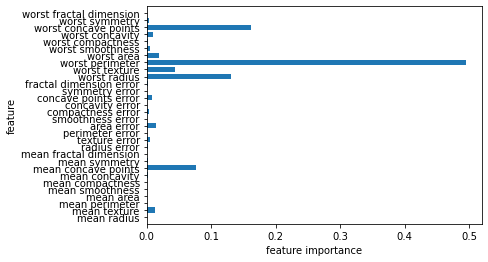

In [86]:
feature_num = X_train.shape[1]
feature_names = data.feature_names

plot_feature_important_up(model, feature_num, feature_names)